<a href="https://colab.research.google.com/github/elsaprelia/MACHINE-LEARNING/blob/main/kuis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : ELSA APRELIANI SUTRISNO

NIM : 2241727010

KELAS : TI-4J

Persiapan

In [1]:
# import package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# baca data
df = pd.read_csv('dataset_quiz.csv')
df.head()

,id_ketua;id_anggota1;id_anggota2;id_anggota3;id_anggota4;id_anggota5;keterlibatan_vltr;jml_vltr_terlibat;tahun;skema;luaran_hki;jenis_luaran_hki;potensi_hki;luaran_lain;jenis_luaran_lain;status_luaran_lain
0,7206;7214;6211;8602;7801;#N/A;TIDAK;0;2019;REG...
1,7214;7109;8402;7903;9202;#N/A;TIDAK;0;2019;REG...
2,5911;8201;8701;9101;9003;#N/A;TIDAK;0;2019;REG...
3,8402;7702;8602;8903;8903;#N/A;TIDAK;0;2019;REG...
4,8201;8305;5911;5903;8402;#N/A;TIDAK;0;2019;REG...


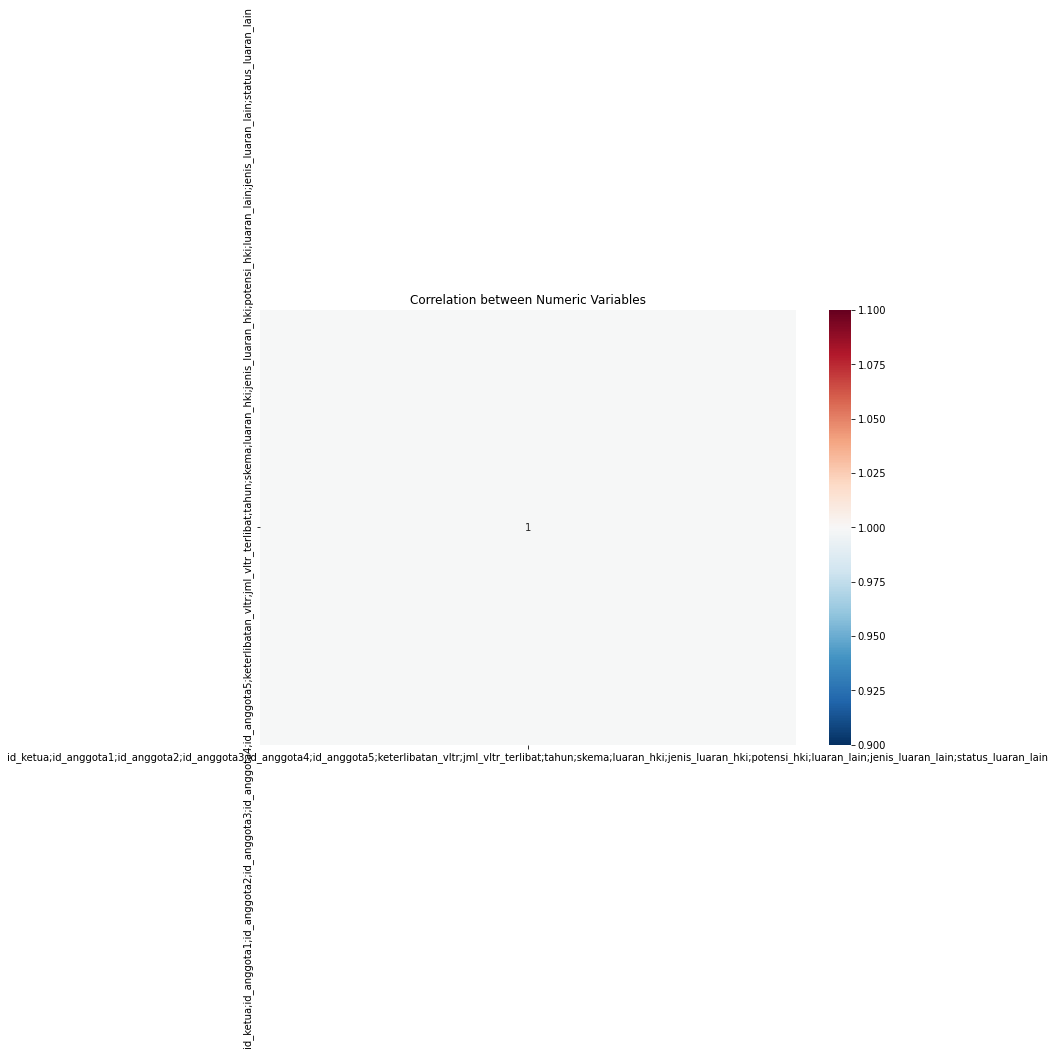

In [4]:
corr_pearson = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,id_ketua;id_anggota1;id_anggota2;id_anggota3;id_anggota4;id_anggota5;keterlibatan_vltr;jml_vltr_terlibat;tahun;skema;luaran_hki;jenis_luaran_hki;potensi_hki;luaran_lain;jenis_luaran_lain;status_luaran_lain
0,13
1,18
2,4
3,56
4,44


1. Buat 5 jenis visualisasi yang dapat dihasilkan dari data yang diberikan! (5 poin)
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)
3. Tentukan data validasi! (5 poin)

In [5]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

Jumlah data asli: 85
Jumlah data train: 68
Jumlah data val: 8
Jumlah data test: 9


4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

In [6]:
# Seleksi fitur

X = df.iloc[:,2:]
y = df['luaran_hki']

# Cek jumlah fitur dan instance
X.shape

KeyError: ignored

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

NameError: ignored